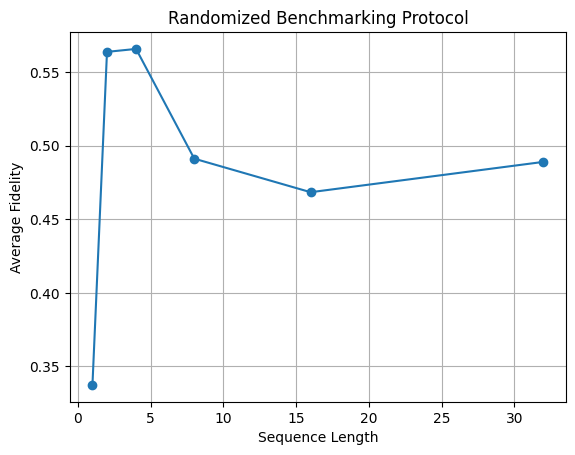

In [1]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit import transpile
import numpy as np
import matplotlib.pyplot as plt

def create_rb_sequence(length, qubit=0):
    circuit = QuantumCircuit(1)

    # Define the set of single-qubit Clifford-like gates
    gate_set = [circuit.h, circuit.x, circuit.y, circuit.z]

    # Apply a random sequence of gates
    for _ in range(length):
        gate = np.random.choice(gate_set)
        gate(qubit)

    gate_set[-1](qubit)  

    return circuit

def run_rb_protocol(lengths, num_trials=50):
    fidelities = []
    simulator = Aer.get_backend('qasm_simulator')

    for length in lengths:
        fidelity_sum = 0

        for _ in range(num_trials):
            rb_sequence = create_rb_sequence(length)

            rb_sequence.measure_all()

            new_circuit = transpile(rb_sequence, simulator)  
            job = simulator.run(new_circuit, shots=100)
            result = job.result()

            counts = result.get_counts(rb_sequence)
            fidelity = counts.get('0', 0) / 100  
            fidelity_sum += fidelity

        average_fidelity = fidelity_sum / num_trials
        fidelities.append(average_fidelity)

    return fidelities

sequence_lengths = [1, 2, 4, 8, 16, 32]
fidelities = run_rb_protocol(sequence_lengths)


plt.plot(sequence_lengths, fidelities, marker='o')
plt.xlabel('Sequence Length')
plt.ylabel('Average Fidelity')
plt.title('Randomized Benchmarking Protocol')
plt.grid(True)
plt.show()